In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, Reshape
from tensorflow.keras import utils


In [198]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # загрузка данных

In [199]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # создаем 10 классов 

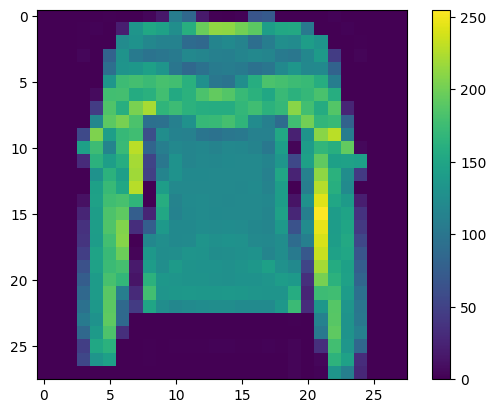

In [200]:

plt.imshow(x_train[14571])
plt.colorbar() # colorbar - показывает градиент

In [201]:
# стандартизация данных / нормализация данных
x_train = x_train / 255
x_test = x_test / 255
# Это значит, что чтобы улучшить алгоритмы оптимизации, которые используются в обучении нейронных сетей,
# мы делим интенсивность каждого пикселя в изображении на 255, чтобы данные на входе в нейронную сеть находились в диапазоне от 0 до 1

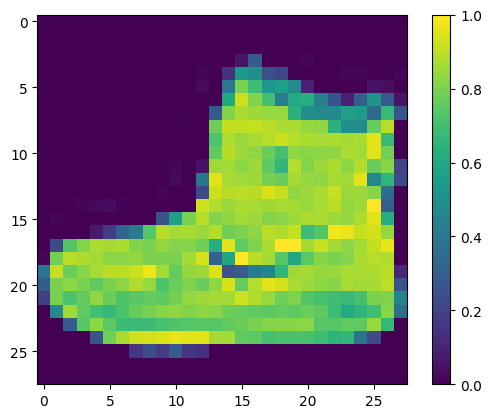

In [202]:
plt.imshow(x_train[0])
plt.colorbar()
# теперь от 0 до 1

In [203]:
model = Sequential([
    Input(shape=(28, 28)),
    Reshape((28, 28, 1)),  # Изменение формы входных данных для работы с CNN
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [204]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [205]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_3 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [206]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7684 - loss: 0.6614
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8738 - loss: 0.3502
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8896 - loss: 0.3029
Epoch 4/10
 540/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8972 - loss: 0.2776

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc # качество предсказания (85,8%)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9094 - loss: 0.2746


0.9097999930381775

In [ ]:
predictions = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
np.argmax(predictions[0])

9

In [ ]:
y_train[0]

9

'Sandal'

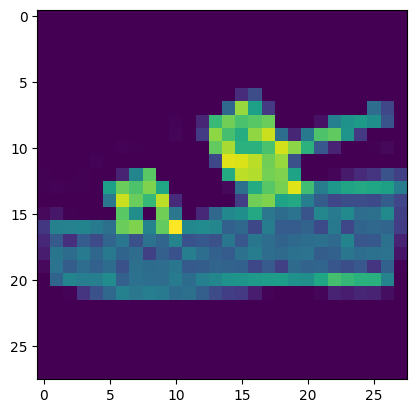

In [ ]:
plt.figure()
plt.imshow(x_train[12])
class_name[np.argmax(predictions[12])]

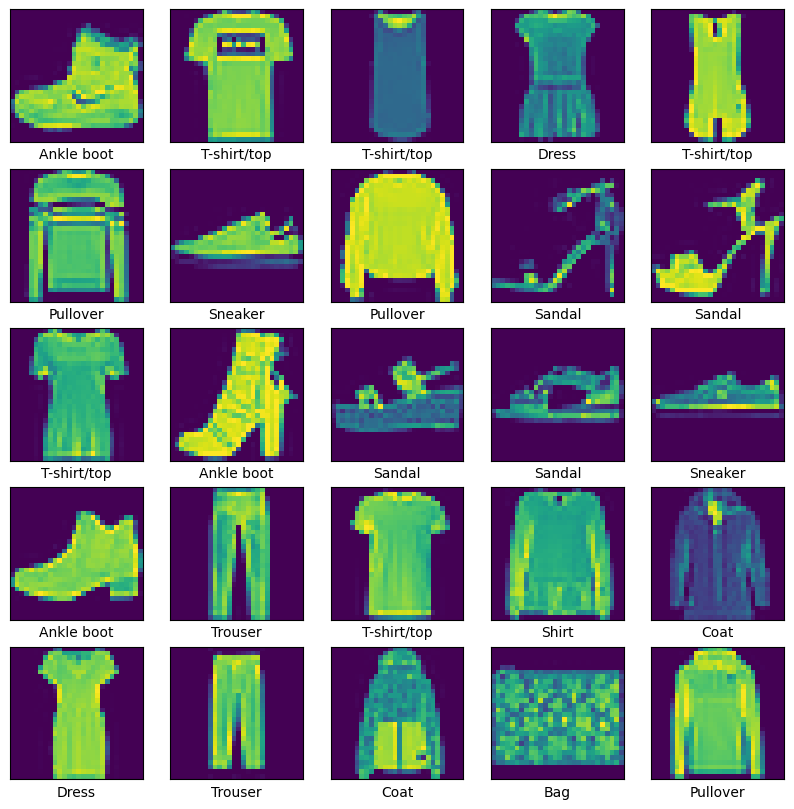

In [ ]:
plt.figure(figsize=(10,10)) # показываем 25 рисунков и их класс
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_name[np.argmax(predictions[i])])